In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import sys, os

In [4]:
sys.path.append('..')

In [5]:
import analysis.bayes_binomial as bayes

In [6]:
import testing.bayes_binomial_mc as bayes_mc

First, let's do a quick convergence check.

In [12]:
data_1000 = bayes_mc.create_data(0.5, 100, 100, 1000)

In [13]:
data_10000 = bayes_mc.create_data(0.5, 100, 100, 10000)

In [15]:
data_1000['odds'] = data_1000.apply(bayes_mc.rowwise_odds, axis=1)

In [19]:
os.makedirs("../testing/mc_convergence", exist_ok=True)

In [20]:
data_1000.to_csv('../testing/mc_convergence/data_1000.csv', index=False)

In [21]:
data_10000['odds'] = data_10000.apply(bayes_mc.rowwise_odds, axis=1)

In [22]:
data_10000.to_csv('../testing/mc_convergence/data_10000.csv', index=False)

In [24]:
data_1000['score'] = data_1000.apply(bayes_mc.rowwise_score, axis=1)

In [25]:
data_10000['score'] = data_10000.apply(bayes_mc.rowwise_score, axis=1)

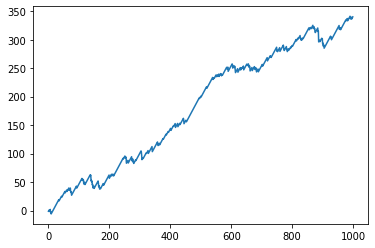

In [26]:
plt.plot(data_1000['score'].cumsum())

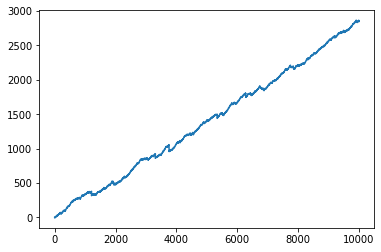

In [27]:
plt.plot(data_10000['score'].cumsum())

In [28]:
data_1000['score'].sum()/1000

0.3401483988737713

In [29]:
data_10000['score'].sum()/10000

0.2844579028253478

In [139]:
def correct_vs_odds(df):
    bin_starts = [1, 1.5, 2, 3, 4, 5, 6, 7, 8]
    bin_ends = bin_starts[1:]
    bin_ends.append(np.infty)
    for start, end in zip(bin_starts, bin_ends):
        vc=df[(df['odds'] >= start) & (df['odds'] < end)]['true_model'].value_counts()
        if 2 in vc.keys():
            twocount = vc[2]
        else:
            twocount = 0
        if sum(vc) > 0:
            correct_frac = twocount/sum(vc)
        else:
            correct_frac = np.nan
        print("[{}, {}): Expected: {:.2f}-{:.2f}  Correct: {} of {} = {:.2f}".format(
            start, end, bayes.impliedProb(start), bayes.impliedProb(end),
            twocount, sum(vc), correct_frac))

In [129]:
correct_vs_odds(data_10000)

[1, 1.5): Expected: 0.50-0.60  Correct: 92 of 187 = 0.49
[1.5, 2): Expected: 0.60-0.67  Correct: 72 of 107 = 0.67
[2, 2.5): Expected: 0.67-0.71  Correct: 65 of 97 = 0.67
[2.5, 3): Expected: 0.71-0.75  Correct: 36 of 58 = 0.62
[3, 4): Expected: 0.75-0.80  Correct: 59 of 75 = 0.79
[4, 5): Expected: 0.80-0.83  Correct: 48 of 61 = 0.79
[5, 10): Expected: 0.83-0.91  Correct: 116 of 142 = 0.82
[10, inf): Expected: 0.91-nan  Correct: 3428 of 3442 = 1.00


In [98]:
correct_vs_odds(data_1000)

[1, 1.5): Expected: 0.50-0.60  Correct: 11 of 27 = 0.41
[1.5, 2): Expected: 0.60-0.67  Correct: 6 of 7 = 0.86
[2, 2.5): Expected: 0.67-0.71  Correct: 8 of 8 = 1.00
[2.5, 3): Expected: 0.71-0.75  Correct: 5 of 7 = 0.71
[3, 4): Expected: 0.75-0.80  Correct: 9 of 12 = 0.75
[4, 5): Expected: 0.80-0.83  Correct: 7 of 7 = 1.00
[5, 10): Expected: 0.83-0.91  Correct: 9 of 11 = 0.82
[10, inf): Expected: 0.91-nan  Correct: 354 of 354 = 1.00


In [125]:
def run_monte_carlo(model_ps=[0.25, 0.5, 0.75], ns = [20, 100, 1000], trials=10000,
                   path="../testing/mc_data"):
    os.makedirs(path, exist_ok=True)
    for model_p in model_ps:
        for n in ns:
            print("Simulating model_p={}, n={}, trials={}...".format(model_p, n, trials))
            df = bayes_mc.create_data(model_p, n, n, trials)
            df['odds'] = df.apply(bayes_mc.rowwise_odds, axis=1)
            df['score'] = df.apply(bayes_mc.rowwise_score, axis=1)
            filename = "{}/mc_modelp_{}_n_{}_trials_{}.csv".format(path, model_p, n, trials)
            df.to_csv(filename, index=False)
            

In [126]:
def display_mc(model_ps=[0.25, 0.5, 0.75], ns=[20, 100, 1000], trials=10000,
              path = "../testing/mc_data"):
    for model_p in model_ps:
        for n in ns:
            filename = "{}/mc_modelp_{}_n_{}_trials_{}.csv".format(path, model_p, n, trials)
            print("\nModel p = {}, n = {}, trials = {}".format(model_p, n, trials))
            try:
                df = pd.read_csv(filename)
            except Exception as e:
                print("File {} could not be read. Maybe it doesn't exist.".format(filename))
                print(e.strerror)
                continue
            correct_vs_odds(df)


In [7]:
bayes_mc.run_monte_carlo(trials=10000)

Simulating model_p=0.25, n=20, trials=10000...
Simulating model_p=0.25, n=100, trials=10000...
Simulating model_p=0.25, n=1000, trials=10000...


/home/brian/.local/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)
/media/sf_share/personal/lare/police_racial_profiling/code/testing/../testing/../analysis/bayes_binomial.py:32: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result = integrate.quad(integrand, 0, 1)


Simulating model_p=0.5, n=20, trials=10000...
Simulating model_p=0.5, n=100, trials=10000...
Simulating model_p=0.5, n=1000, trials=10000...


/home/brian/.local/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


Simulating model_p=0.75, n=20, trials=10000...
Simulating model_p=0.75, n=100, trials=10000...
Simulating model_p=0.75, n=1000, trials=10000...


/home/brian/.local/lib/python3.10/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)
/media/sf_share/personal/lare/police_racial_profiling/code/testing/../testing/../analysis/bayes_binomial.py:32: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result = integrate.quad(integrand, 0, 1)


In [8]:
bayes_mc.display_mc(trials=10000)


Model p = 0.25, n = 20, trials = 10000
[1, 1.5): Expected: 0.50-0.60  Correct: 144 of 455 = 0.32
[1.5, 2): Expected: 0.60-0.67  Correct: 48 of 131 = 0.37
[2, 3): Expected: 0.67-0.75  Correct: 104 of 271 = 0.38
[3, 4): Expected: 0.75-0.80  Correct: 56 of 118 = 0.47
[4, 5): Expected: 0.80-0.83  Correct: 81 of 136 = 0.60
[5, 6): Expected: 0.83-0.86  Correct: 23 of 41 = 0.56
[6, 7): Expected: 0.86-0.88  Correct: 20 of 38 = 0.53
[7, 8): Expected: 0.88-0.89  Correct: 0 of 0 = nan
[8, inf): Expected: 0.89-nan  Correct: 1083 of 1141 = 0.95

Model p = 0.25, n = 100, trials = 10000
[1, 1.5): Expected: 0.50-0.60  Correct: 39 of 175 = 0.22
[1.5, 2): Expected: 0.60-0.67  Correct: 38 of 87 = 0.44
[2, 3): Expected: 0.67-0.75  Correct: 56 of 114 = 0.49
[3, 4): Expected: 0.75-0.80  Correct: 25 of 53 = 0.47
[4, 5): Expected: 0.80-0.83  Correct: 25 of 42 = 0.60
[5, 6): Expected: 0.83-0.86  Correct: 11 of 23 = 0.48
[6, 7): Expected: 0.86-0.88  Correct: 17 of 22 = 0.77
[7, 8): Expected: 0.88-0.89  Correct